In [1]:
import matplotlib.pyplot as plt
from pyfonts import load_font
from highlight_text import ax_text
from drawarrow import ax_arrow
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

C:\Users\MELİH\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data_lec = pd.read_csv("lap_times_lec.csv")

In [3]:
data_lec.head()

,Lap,Time
0,1,15:05:02
1,2,25.396
2,3,25.179
3,4,24.810
4,5,24.603


In [4]:
condition = (data_lec["Lap"] == 1 )| (data_lec["Lap"] == 15) | (data_lec["Lap"] == 16) # deleting 1st , 15th and 16th laps
data_lec=data_lec.iloc[data_lec[~condition].index,:].reset_index()

In [5]:
data_lec["Time"]=data_lec["Time"].astype(float)
data_lec.head()

,index,Lap,Time
0,1,2,25.396
1,2,3,25.179
2,3,4,24.810
3,4,5,24.603
4,5,6,24.663


In [6]:
data_lec[data_lec["Time"] == data_lec["Time"].min()] #best-lap

,index,Lap,Time
29,32,33,23.226


In [7]:
best_lap = data_lec[data_lec["Time"] == data_lec["Time"].min()] 

best_lap_index = best_lap.index[0] 
best_lap_lap = best_lap["Lap"].values[0] 
best_lap_time = best_lap["Time"].values[0]

In [8]:
font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Light.ttf?raw=true')
bold_font = load_font('https://github.com/coreyhu/Urbanist/blob/main/fonts/ttf/Urbanist-Medium.ttf?raw=true')
arrow_props = dict(color='black', tail_width=0.15, linewidth=0.5, head_width=6, head_length=8)

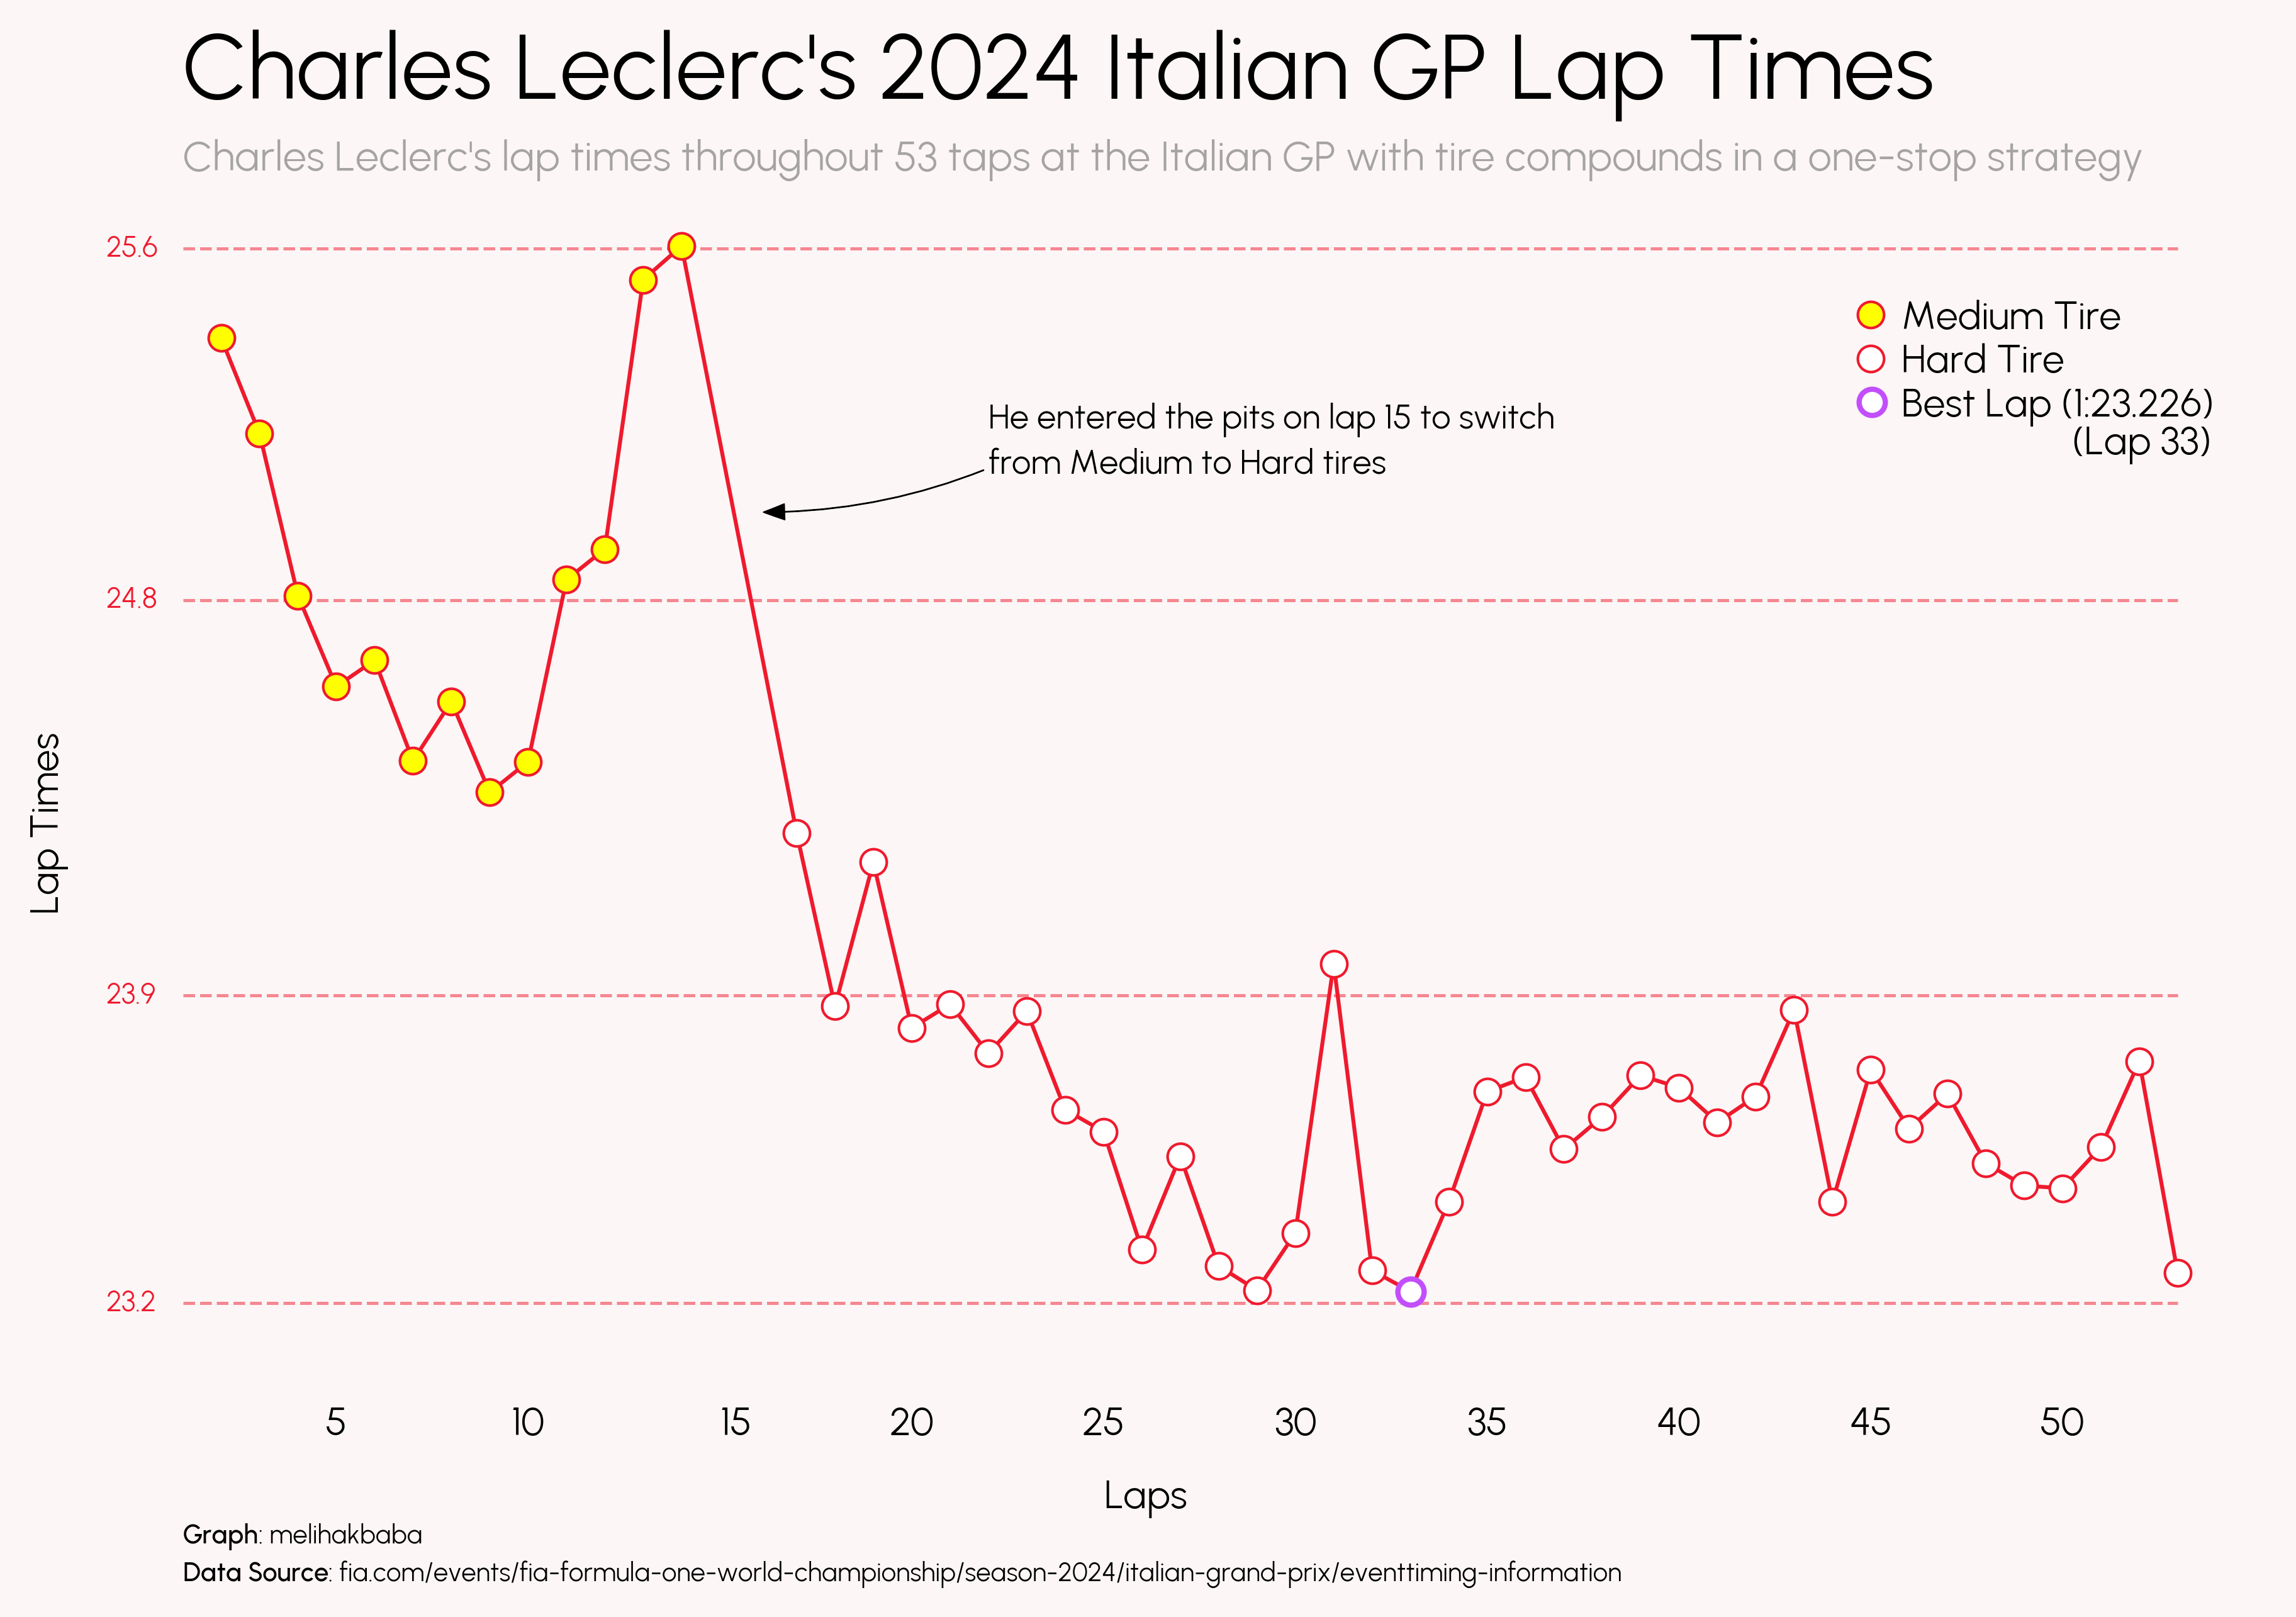

In [9]:
fig,ax = plt.subplots(figsize=(15,8),dpi=300)

fig.patch.set_facecolor('#FCF6F6')
ax.set_axis_off()

for i,row in data_lec.iterrows():
    if i <= 12:
        lap = row["Lap"]
        time = row["Time"]
        ax.scatter(x=lap,y=time,color="yellow",edgecolors="#EF1A2D",s=100)
        
    if i > 12:
        lap = row["Lap"]
        time = row["Time"]
        ax.scatter(x=lap,y=time,color="white",edgecolors="#EF1A2D",s=100)
        
    if i == best_lap_index:
        lap = row["Lap"]
        time = row["Time"]
        ax.scatter(x=lap,y=time,color="white",edgecolors="#C24EFC",s=100,linewidths=2)
        
    if lap % 5 == 0:
        ax.text(x=lap,y=22.9,s=f"{lap:.0f}",font=font,size=15,ha="center")
    
ax.text(x=15,y=22.9,s="15",font=font,size=15,ha="left")


sns.lineplot(
    data=data_lec,
    x='Lap', y='Time',
    color='#EF1A2D',
    ax=ax,
    zorder=-1)

h_lines= [23.200,23.900,24.800,25.600]
ax.hlines(y=h_lines,xmin=1,xmax=53,color="#EF1A2D",linewidth=1.2, zorder=-1, alpha=0.5,linestyles="--")
       
for numbers in h_lines:
    ax.text(x=-1,y=numbers,s=f"{numbers}",font=font,color='#EF1A2D',size=11, va='center')

    
    
s = "Charles Leclerc's 2024 Italian GP Lap Times"
ax_text(x=1, y=26.1, s=s, font=font, size=35, ha='left')

s = "Charles Leclerc's lap times throughout 53 taps at the Italian GP with tire compounds in a one-stop strategy"
ax_text(x=1, y=25.85, s=s, font=font, size=16, ha='left', color='grey', alpha=0.7)

s = '<Graph>: melihakbaba\n<Data Source>: fia.com/events/fia-formula-one-world-championship/season-2024/italian-grand-prix/eventtiming-information'
ax_text(x=1, y=22.7, s=s, font=font, size=10, ha='left', highlight_textprops=[{'font': bold_font}]*2)

ax_text(x=25, y=22.8, s="Laps", font=font, size=15, ha='left')
ax_text(x=-3, y=24.50, s="Lap Times", font=font, size=15, ha='left',rotation=90)

ax.scatter(x=45,y=25.45,color="yellow",edgecolors="#EF1A2D",s=100)
ax_text(x=45.8, y=25.485, s="Medium Tire", font=font, size=15, ha='left')

ax.scatter(x=45,y=25.35,color="white",edgecolors="#EF1A2D",s=100)
ax_text(x=45.8, y=25.385, s="Hard Tire", font=font, size=15, ha='left')

ax.scatter(x=45.03,y=25.25,color="white",edgecolors="#C24EFC",s=100,linewidths=2)
ax_text(x=45.8, y=25.285, s=f"Best Lap (1:{best_lap_time})", font=font, size=15, ha='left')
ax_text(x=50.25, y=25.2, s=f"(Lap {best_lap_lap})", font=font, size=15, ha='left')




s = 'He entered the pits on lap 15 to switch \nfrom Medium to Hard tires'
ax_text(x=22, y=25.25, s=s, font=font, size=13, ha='left')
ax_arrow(
   tail_position=(22, 25.1), head_position=(16, 25), invert=True, **arrow_props
)



plt.savefig("Charles Leclerc's 2024 Italian GP Lap Times Chart.png",dpi=300,bbox_inches='tight')